In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Fetching The Data
data = yf.download("AAPL",period='10y') ## Apple Dataset

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-10,27.254999,27.332500,27.167500,27.207500,24.235826,108782000
2014-11-11,27.174999,27.437500,27.100000,27.424999,24.429565,109769200
2014-11-12,27.344999,27.857500,27.342501,27.812500,24.774752,187769600
2014-11-13,27.950001,28.362499,27.900000,28.205000,25.124369,238091600
2014-11-14,28.287500,28.547501,27.802500,28.545000,25.427237,176254400
...,...,...,...,...,...,...
2024-11-04,220.990005,222.789993,219.710007,222.009995,221.766006,44944500
2024-11-05,221.800003,223.949997,221.139999,223.449997,223.204422,28111300
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100


In [3]:
#Resetting the index which was set to date before
data.reset_index(inplace=True)

In [4]:
data.drop(["Date","Adj Close"],axis=1,inplace=True)

In [5]:
data

,Open,High,Low,Close,Volume
0,27.254999,27.332500,27.167500,27.207500,108782000
1,27.174999,27.437500,27.100000,27.424999,109769200
2,27.344999,27.857500,27.342501,27.812500,187769600
3,27.950001,28.362499,27.900000,28.205000,238091600
4,28.287500,28.547501,27.802500,28.545000,176254400
...,...,...,...,...,...
2512,220.990005,222.789993,219.710007,222.009995,44944500
2513,221.800003,223.949997,221.139999,223.449997,28111300
2514,222.610001,226.070007,221.190002,222.720001,54561100
2515,224.630005,227.880005,224.570007,227.479996,42137700


In [6]:
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

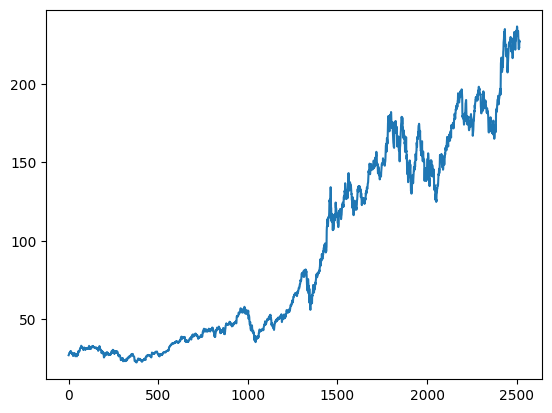

In [7]:
plt.plot(data["Close"])
plt.show()

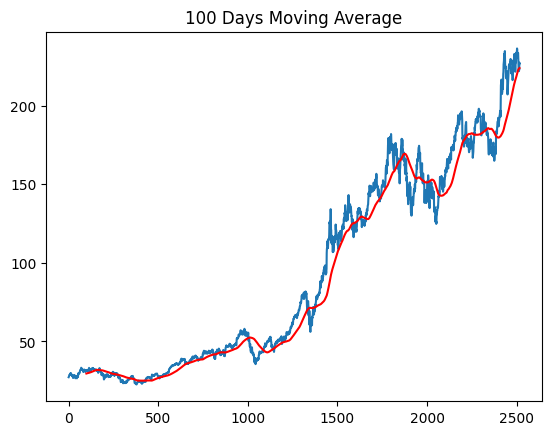

In [8]:
# Moving Averages on Close

#For 100 days
ma100 = data['Close'].rolling(100).mean()

plt.title("100 Days Moving Average")
plt.plot(data["Close"])
plt.plot(ma100,'r')


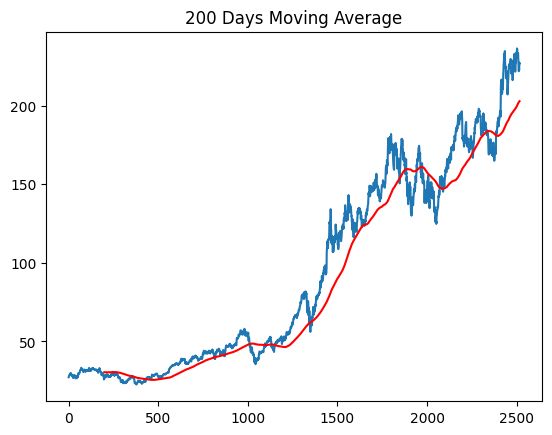

In [9]:
# Moving Averages on Close

#For 200 days
ma200 = data['Close'].rolling(200).mean()

plt.title("200 Days Moving Average")
plt.plot(data["Close"])
plt.plot(ma200,'r')


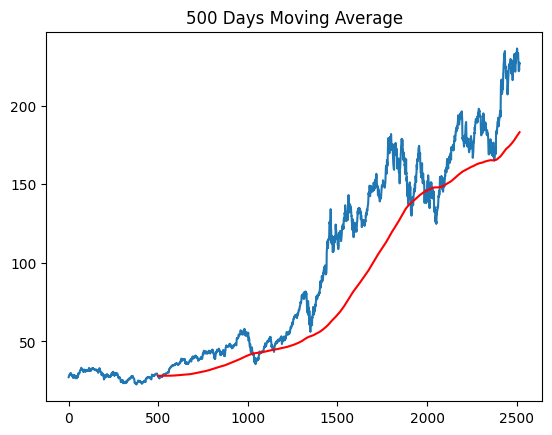

In [10]:
# Moving Averages on Close

#For d500 days
ma500 = data['Close'].rolling(500).mean()

plt.title("500 Days Moving Average")
plt.plot(data["Close"])
plt.plot(ma500,'r')


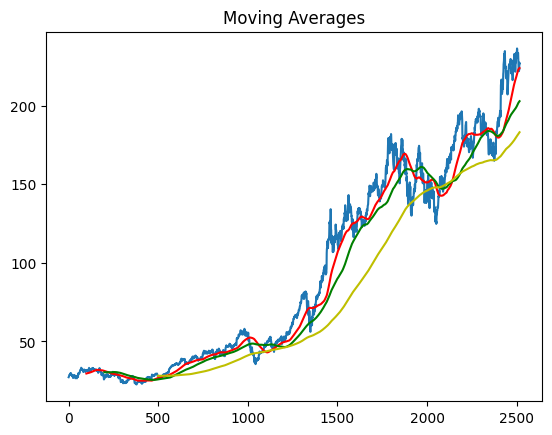

In [11]:
# Comparision between all three moving averages

plt.title("Moving Averages")
plt.plot(data["Close"])
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.plot(ma500,'y')

In [15]:
train = pd.DataFrame(data['Close'][0 : int(len(data)*0.70)])
test = pd.DataFrame(data['Close'][int(len(data)*0.70) : int(len(data))])

In [16]:
train

,Close
0,27.207500
1,27.424999
2,27.812500
3,28.205000
4,28.545000
...,...
1756,148.960007
1757,150.020004
1758,151.490005
1759,150.960007


In [17]:
test

,Close
1761,150.440002
1762,150.809998
1763,147.919998
1764,147.869995
1765,149.990005
...,...
2512,222.009995
2513,223.449997
2514,222.720001
2515,227.479996


In [18]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
train_array = minmax.fit_transform(train)

c:\Users\bharg\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
train_array

array([[0.03446927],
       [0.03609112],
       [0.03898066],
       ...,
       [0.96122444],
       [0.95727232],
       [0.95965845]])

In [20]:
x_train = []
y_train = []

for i in range(100,train_array.shape[0]):
    x_train.append(train_array[i-100 : i])
    y_train.append(train_array[i,0])

x_train,y_train = np.array(x_train) , np.array(y_train)

In [21]:
x_train.shape

(1661, 100, 1)

In [ ]:
#ML Model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [62]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu', return_sequences  = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60 , activation = 'relu', return_sequences  = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80 , activation = 'relu', return_sequences  = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120 , activation = 'relu', return_sequences  = False))
model.add(Dropout(0.5))


model.add(Dense(units=1))

c:\Users\bharg\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - loss: 0.0642
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 0.0067
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0066
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 0.0056
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.0043
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.0047
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0046
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.0041
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0046
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.0046
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0035
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 0.0035
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 0.0035
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0044
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - l

In [65]:
past_100_days_data = train.tail(100)

In [84]:
testing_data = pd.concat([past_100_days_data, test], ignore_index=True)
process_test_data = minmax.transform(testing_data)

process_test_data

array([[6.07392490e-02],
       [4.88068376e-02],
       [6.53149692e-02],
       [8.03875754e-02],
       [7.78754744e-02],
       [7.52737044e-02],
       [7.25821284e-02],
       [8.75650656e-02],
       [1.01471427e-01],
       [1.07123723e-01],
       [1.09904968e-01],
       [1.34039209e-01],
       [1.52521153e-01],
       [1.75399344e-01],
       [1.63466795e-01],
       [1.80244071e-01],
       [1.74771250e-01],
       [1.84999129e-01],
       [2.16490198e-01],
       [2.10479089e-01],
       [1.91728000e-01],
       [1.56378974e-01],
       [1.89574712e-01],
       [1.82845841e-01],
       [1.95406483e-01],
       [2.11196852e-01],
       [2.15054809e-01],
       [1.95137339e-01],
       [1.79077689e-01],
       [1.84999129e-01],
       [1.86972942e-01],
       [1.83922553e-01],
       [2.00430685e-01],
       [1.96752202e-01],
       [1.97739109e-01],
       [1.89485043e-01],
       [1.89036424e-01],
       [1.84640316e-01],
       [1.86972942e-01],
       [2.14157572e-01],


In [76]:
process_test_data.shape

(856, 1)

In [85]:
x_test = []
y_test = []

for i in range(100, process_test_data.shape[0]):
    x_test.append(process_test_data[i-100:i])
    y_test.append(process_test_data[i,0])
    

In [86]:
x_test , y_test = np.array(x_test) , np.array(y_test)

In [87]:
y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [88]:
y_pred.shape

(756, 1)

In [89]:
# Scaling Up 
y_pred = y_pred * ( (1/minmax.scale_) )
y_test = y_test * ( (1/minmax.scale_) )


In [90]:
y_pred.shape

(756, 1)

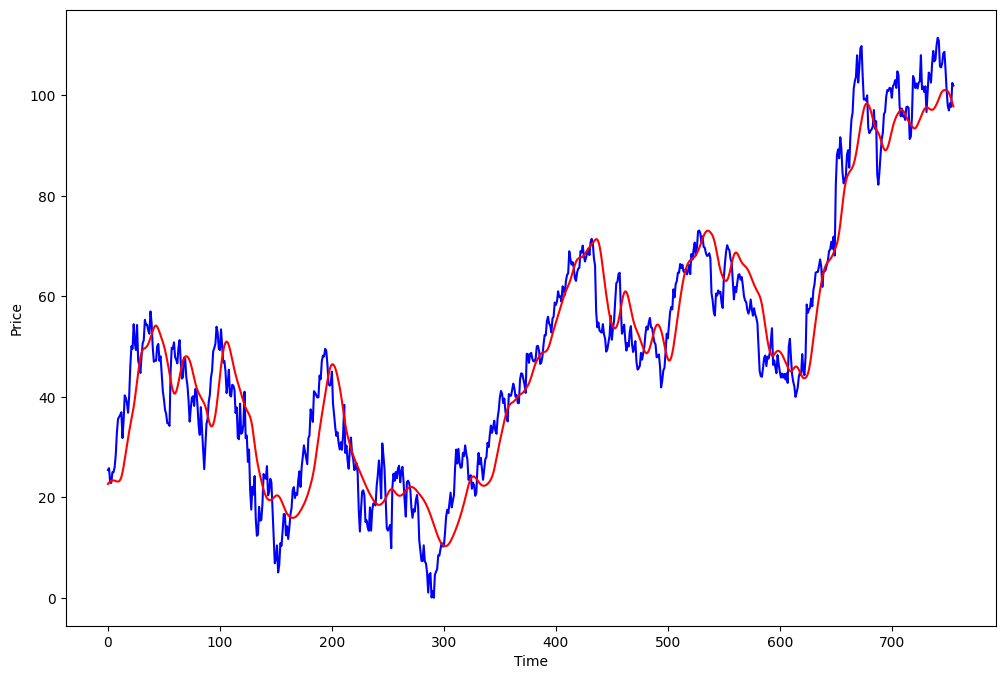

In [99]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()